# Projekt Eksploracji Danych Youtube Trending - Checkpoint 2

### Maria Naklicka    
127313 ISWD

### Norbert Schlaffke 
127201 ISWD

## Import bibliotek

In [70]:
import pandas as pd
import urllib
import csv
import matplotlib.pyplot as plt
import matplotlib.style as style 
from urllib.error import HTTPError

In [71]:
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot')

## Wczytanie danych

W tej części projektu będziemy zajmować się miniaturami dla filmów. Jako że w danych niektóre filmy występują kilkukrotnie, ograniczymy się do pierwszego wystąpienia każdego filmu na liście.

In [72]:
data = pd.read_csv("./youtube_data/videos_5p.csv", sep=";")
data = data.drop_duplicates(subset='video_id', keep='first')

In [73]:
data.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,NaN,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,NaN,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,NaN,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...


In [74]:
len(data)

8606

## Pobranie miniatur z sieci

**Poniższa komórka zawiera kod potrzebny do pobrania obrazków z Internetu. Aby dane nie pobierały się przy każdym uruchomieniu, komórka została zmieniona na typ `Raw`. W celu pobrania danych z Inernetu należy zmienić jej typ na `Code` i uruchomić.**

In [75]:
failed_indexes = pd.read_csv("./youtube_data/failed_thumbnails.txt").transpose()
failed_indexes = failed_indexes.reset_index()

In [76]:
len(failed_indexes)

680

680 miniatur nie zostało znalezionych. Być może zostały usunięte. Sprawdzimy, czy może mieć to związek z atrybutem `video_error_or_removed`.

In [77]:
failed_data = data.loc[data['video_id'].isin(failed_indexes['index'])]

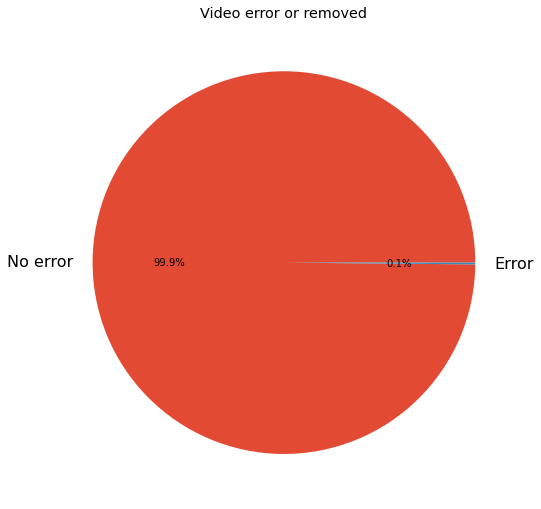

In [78]:
plt.pie(failed_data.video_error_or_removed.value_counts()/failed_data.video_error_or_removed.count(),
        labels=["No error", "Error"], 
        autopct='%1.1f%%');
plt.title('Video error or removed');

Brak zdjęcia nie jest powiązany z atrybutem `video_error_or_removed`.

## Atrybuty wytworzone z obrazu